In [2]:
%matplotlib inline


# Comparison of the combination of over- and under-sampling algorithms


This example shows the effect of applying an under-sampling algorithms after
SMOTE over-sampling. In the literature, Tomek's link and edited nearest
neighbours are the two methods which have been used and are available in
imbalanced-learn.




In [3]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

print(__doc__)

Automatically created module for IPython interactive environment


The following function will be used to create toy dataset. It using the
``make_classification`` from scikit-learn but fixing some parameters.



In [4]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

The following function will be used to plot the sample space after resampling
to illustrate the characteristic of an algorithm.



In [12]:
def plot_resampling(X, y, sampling, ax, applySampling=True):
    if (applySampling==True):
        X_res, y_res = sampling.fit_sample(X, y) #doesn't affect to the original datasets.
    else:
        X_res, y_res = X, y
    print('modified dataset: ', np.shape(X_res))
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

The following function will be used to plot the decision function of a
classifier given some data.



In [7]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step)) #to make a grid inside factible values with plot_step

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # predict under a flat array, not over a matrix.
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

``SMOTE`` allows to generate samples. However, this method of over-sampling
does not have any knowledge regarding the underlying distribution. Therefore,
some noisy samples can be generated, e.g. when the different classes cannot
be well separated. Hence, it can be beneficial to apply an under-sampling
algorithm to clean the noisy samples. Two methods are usually used in the
literature: (i) Tomek's link and (ii) edited nearest neighbours cleaning
methods. Imbalanced-learn provides two ready-to-use samplers ``SMOTETomek``
and ``SMOTEENN``. In general, ``SMOTEENN`` cleans more noisy data than
``SMOTETomek``.



'\nprint(X)\nprint(y)\n\nzip_ax = zip(ax_arr, (\n        SMOTE(random_state=0),\n        SMOTEENN(random_state=0),\n        SMOTETomek(random_state=0)))\ndic_zip = dict(zip_ax)\nprint(dic_zip)\n'

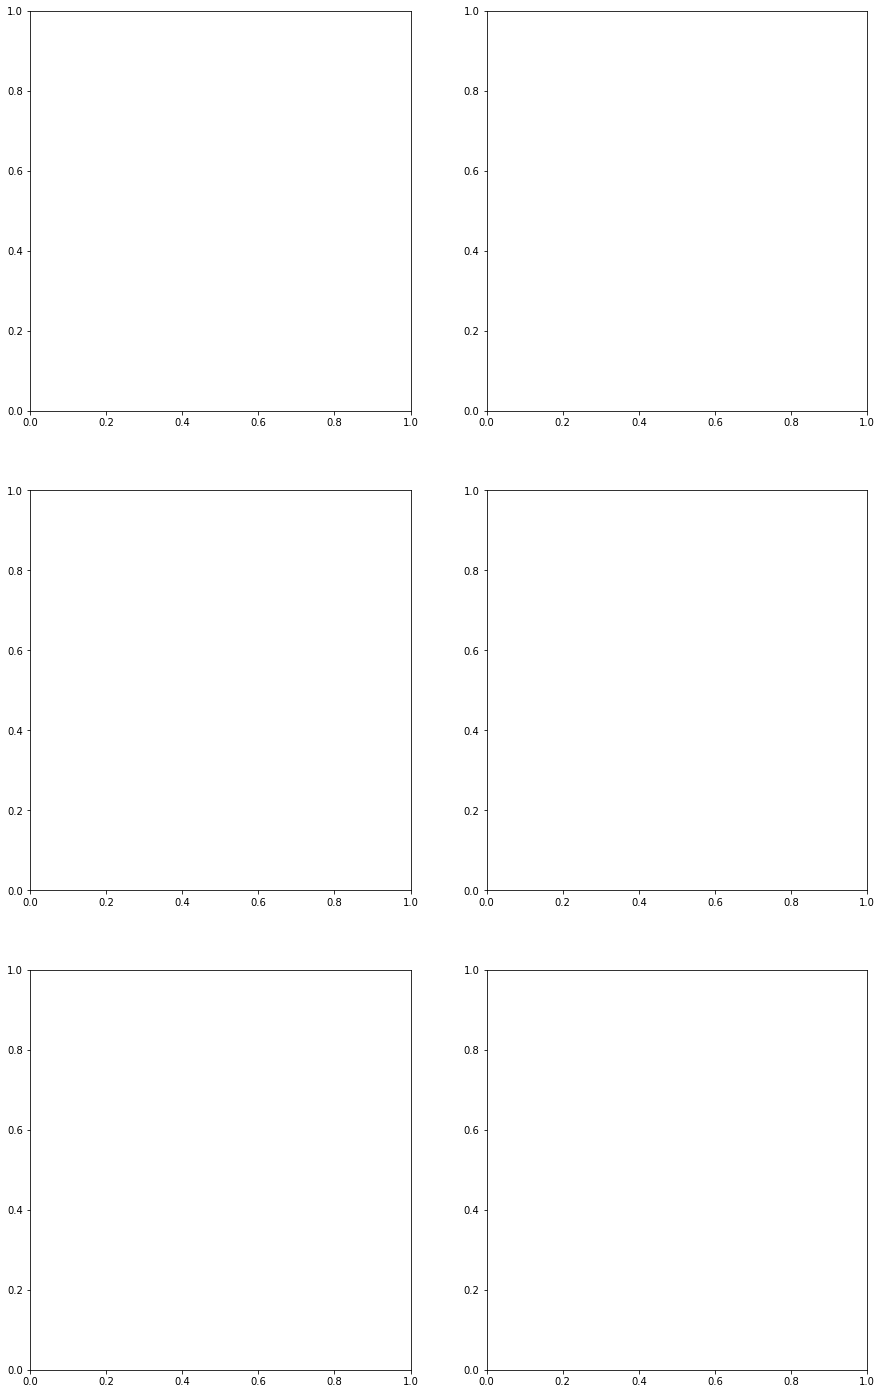

In [20]:
'''
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,
                                                         figsize=(15, 25))
X, y = create_dataset(n_samples=1000, weights=(0.1, 0.2, 0.7))

ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))

print(X)
print(y)

zip_ax = zip(ax_arr, (
        SMOTE(random_state=0),
        SMOTEENN(random_state=0),
        SMOTETomek(random_state=0)))
dic_zip = dict(zip_ax)
print(dic_zip)
'''

In [25]:
xx, yy = np.meshgrid(np.arange(0, 5, 0.2),
                         np.arange(1, 8, 0.1))
print(xx)
print(yy)
print(np.shape(xx))
# np.arange(0, 5, 0.2)
# np.shape(xx.ravel()) #flat the array to 1 dimension!
np.copy(xx)

[[ 0.   0.2  0.4 ...,  4.4  4.6  4.8]
 [ 0.   0.2  0.4 ...,  4.4  4.6  4.8]
 [ 0.   0.2  0.4 ...,  4.4  4.6  4.8]
 ..., 
 [ 0.   0.2  0.4 ...,  4.4  4.6  4.8]
 [ 0.   0.2  0.4 ...,  4.4  4.6  4.8]
 [ 0.   0.2  0.4 ...,  4.4  4.6  4.8]]
[[ 1.   1.   1.  ...,  1.   1.   1. ]
 [ 1.1  1.1  1.1 ...,  1.1  1.1  1.1]
 [ 1.2  1.2  1.2 ...,  1.2  1.2  1.2]
 ..., 
 [ 7.7  7.7  7.7 ...,  7.7  7.7  7.7]
 [ 7.8  7.8  7.8 ...,  7.8  7.8  7.8]
 [ 7.9  7.9  7.9 ...,  7.9  7.9  7.9]]
(70, 25)


array([[ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8],
       [ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8],
       [ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8],
       ..., 
       [ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8],
       [ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8],
       [ 0. ,  0.2,  0.4, ...,  4.4,  4.6,  4.8]])

original dataset:  (1000, 2)
modified dataset:  (2082, 2)
modified dataset:  (1000, 2)
modified dataset:  (1385, 2)
modified dataset:  (1000, 2)
modified dataset:  (1908, 2)
modified dataset:  (1000, 2)


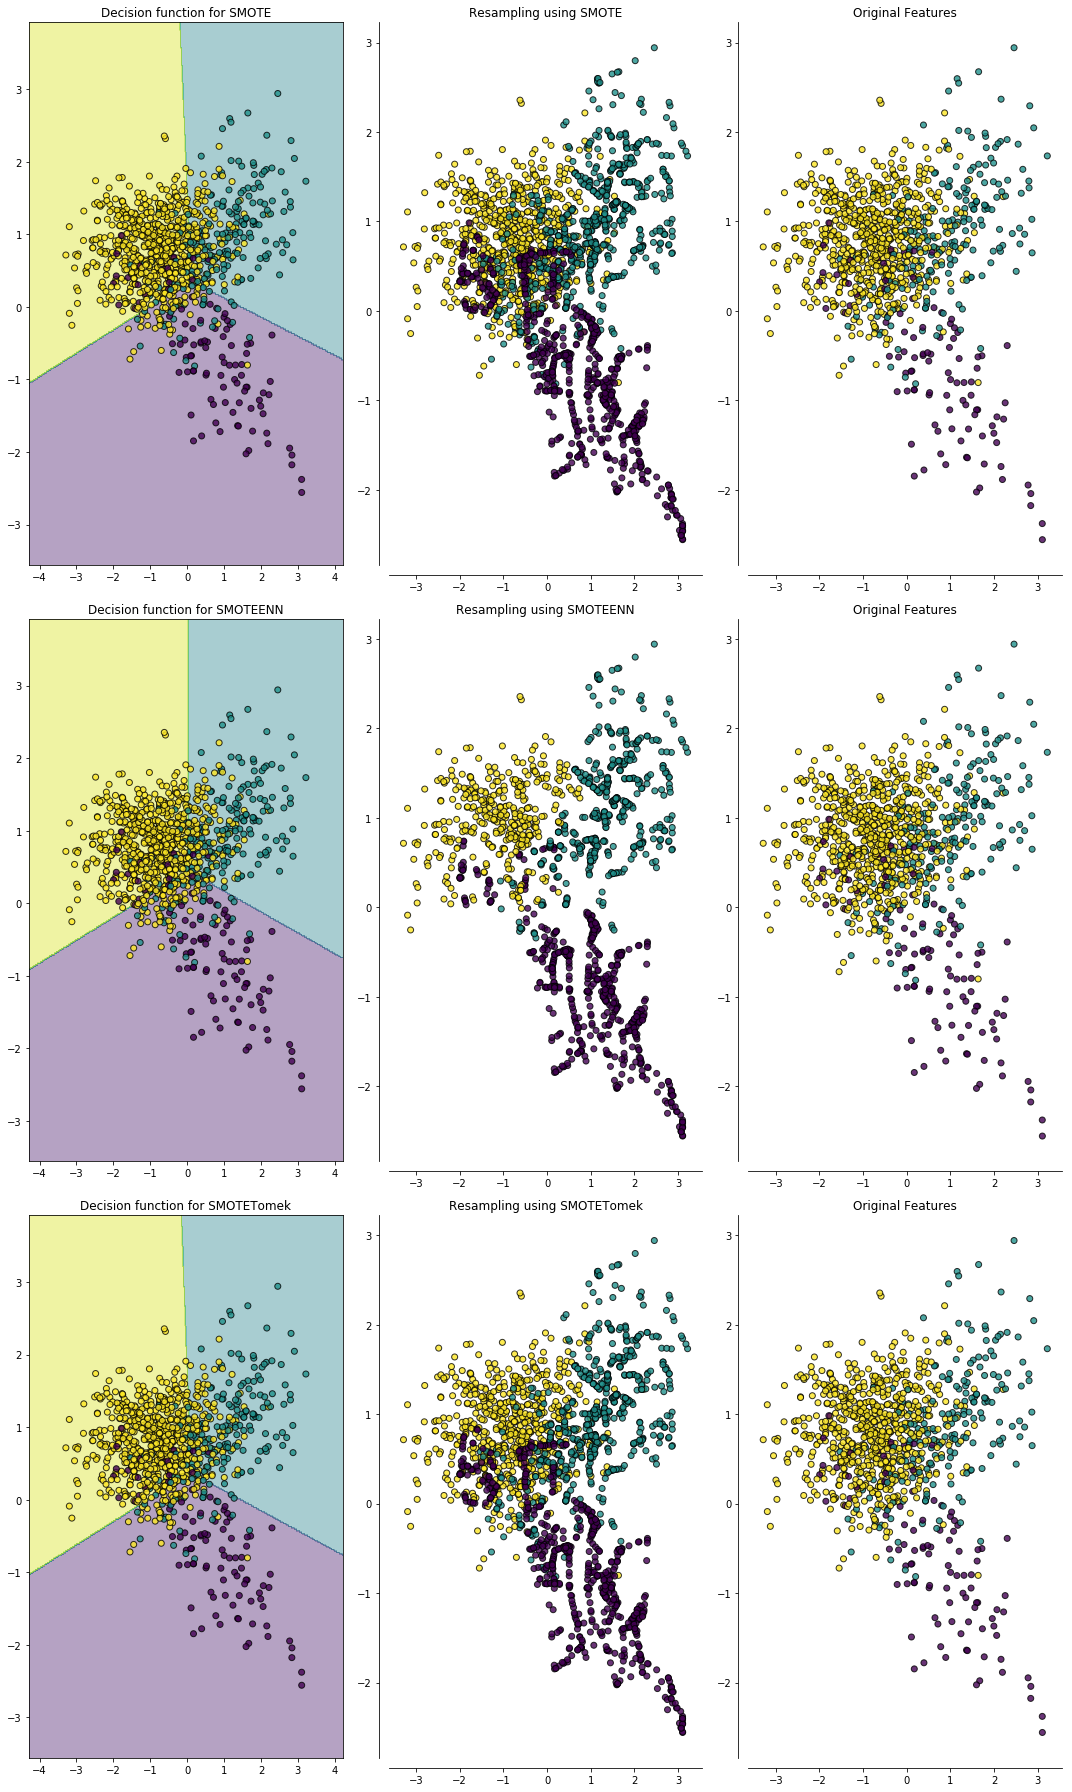

In [13]:
fig, ((ax1, ax2, ax7), (ax3, ax4, ax8), (ax5, ax6, ax9)) = plt.subplots(3, 3,
                                                         figsize=(15, 25))
X, y = create_dataset(n_samples=1000, weights=(0.1, 0.2, 0.7))
x_c, y_c = np.copy(X), np.copy(y)
print('original dataset: ', np.shape(X))

ax_arr = ((ax1, ax2, ax7), (ax3, ax4, ax8), (ax5, ax6, ax9))
for ax, sampler in zip(ax_arr, (
        SMOTE(random_state=0),
        SMOTEENN(random_state=0),
        SMOTETomek(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC()) #applying oversampling and a LinearSVC() as classifier
    clf.fit(X, y)    
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
    plot_resampling(x_c, y_c, None, ax[2], applySampling=False)
    ax[2].set_title('Original Features')
    
fig.tight_layout()
plt.show()